In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
from google.colab import files
uploaded = files.upload()  ## Chọn file diabetes.csv

Saving diabetes.csv to diabetes.csv


In [4]:
data = pd.read_csv("diabetes.csv")
print(data.head(5))  ##Kiểm tra xem thử 5 dòng đầu tiên

#Xem kiểu dữ liệu và kích thước của data
print("Kiểu dữ liệu mỗi cột:")
print(data.dtypes)
print("\nKích thước dữ liệu (số dòng, số cột):", data.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Kiểu dữ liệu mỗi cột:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                          

In [5]:
#Kiểm tra bản ghi trùng lặp
num_dup = data.duplicated().sum()
print("\nSố bản ghi trùng lặp:", num_dup)


Số bản ghi trùng lặp: 0


In [7]:
#Kiểm tra số giá trị bằng 0 (Missing value giả định)
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print("\nSố lượng giá trị = 0 ở các cột nghi ngờ:")
print((data[cols_with_zero] == 0).sum())

#Tỷ lệ missing giả định
print("\n--- Tỷ lệ giá trị 0 (giả missing) theo phần trăm ---")
print(((data[cols_with_zero] == 0).sum() / len(data) * 100).round(2))


Số lượng giá trị = 0 ở các cột nghi ngờ:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

--- Tỷ lệ giá trị 0 (giả missing) theo phần trăm ---
Glucose           0.65
BloodPressure     4.56
SkinThickness    29.56
Insulin          48.70
BMI               1.43
dtype: float64


In [8]:
#Kiểm tra giá trị bị thiếu NaN
print("\nSố giá trị bị thiếu (NaN) từng cột:")
print(data.isnull().sum())


#XỬ LÝ GIÁ TRỊ = 0 (MISSING GIẢ)
#Thay giá trị 0 trong các cột nghi ngờ bằng giá trị trung vị (median)
for col in cols_with_zero:
    median_val = data[col][data[col] > 0].median()
    data[col] = data[col].replace(0, median_val)


print("\n Đã xử lý giá trị 0 (thay bằng median của từng biến).")
print(data[cols_with_zero].head())


Số giá trị bị thiếu (NaN) từng cột:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Đã xử lý giá trị 0 (thay bằng median của từng biến).
   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0      148             72             35      125  33.6
1       85             66             29      125  26.6
2      183             64             29      125  23.3
3       89             66             23       94  28.1
4      137             40             35      168  43.1


In [9]:
#-------------------------------
#THỐNG KÊ MÔ TẢ
#-------------------------------


summary_stats = pd.DataFrame({ 'Mean': data.mean(), 'Median': data.median(), 'Mode': data.mode().iloc[0], 'Variance': data.var(), 'Std_Dev': data.std(), 'Min': data.min(), 'Max': data.max(), 'Range': data.max() - data.min(), 'Q1': data.quantile(0.25), 'Q2': data.quantile(0.50), 'Q3': data.quantile(0.75), 'IQR': data.quantile(0.75) - data.quantile(0.25) }).round(2)
print(summary_stats)

                            Mean  Median    Mode  Variance  Std_Dev    Min  \
Pregnancies                 3.85    3.00    1.00     11.35     3.37   0.00   
Glucose                   121.66  117.00   99.00    926.49    30.44  44.00   
BloodPressure              72.39   72.00   72.00    146.33    12.10  24.00   
SkinThickness              29.11   29.00   29.00     77.29     8.79   7.00   
Insulin                   140.67  125.00  125.00   7462.03    86.38  14.00   
BMI                        32.46   32.30   32.30     47.27     6.88  18.20   
DiabetesPedigreeFunction    0.47    0.37    0.25      0.11     0.33   0.08   
Age                        33.24   29.00   22.00    138.30    11.76  21.00   
Outcome                     0.35    0.00    0.00      0.23     0.48   0.00   

                             Max   Range      Q1      Q2      Q3    IQR  
Pregnancies                17.00   17.00    1.00    3.00    6.00   5.00  
Glucose                   199.00  155.00   99.75  117.00  140.25  40.50


Vẽ biểu đồ phân bố (Histogram + KDE) cho từng biến:


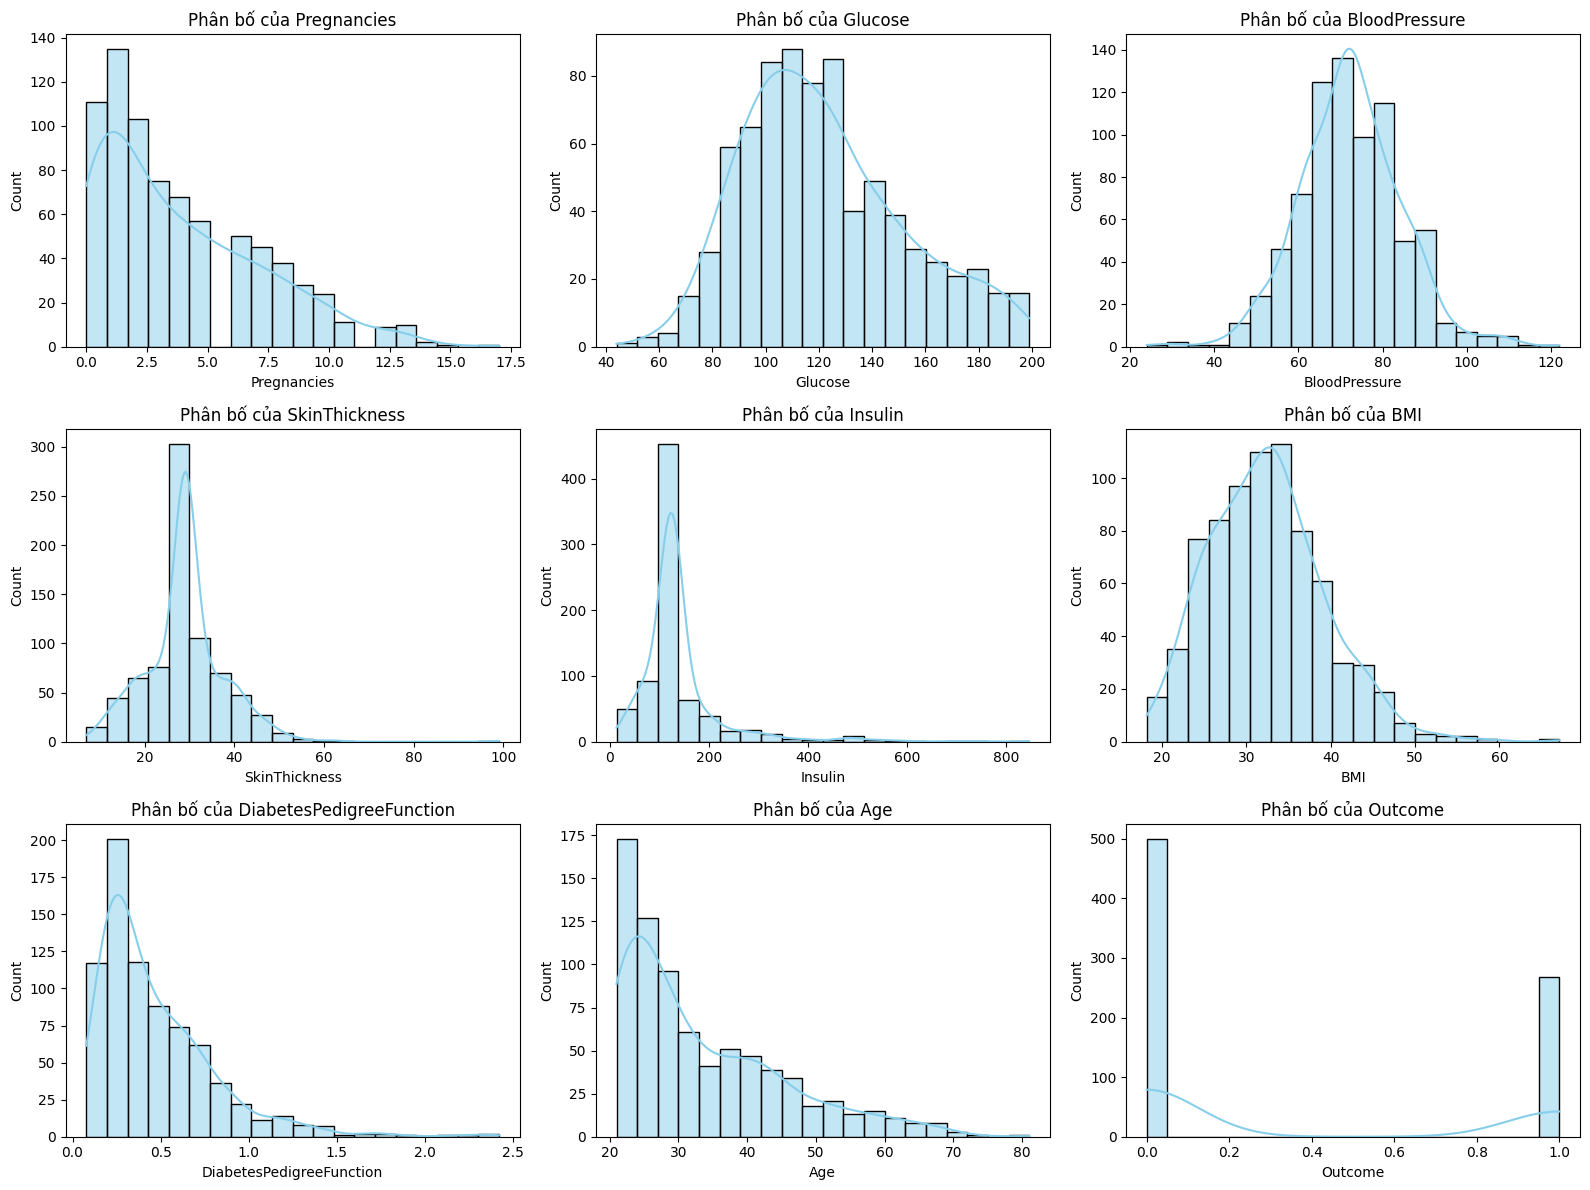

In [10]:
#KIỂM TRA PHÂN BỐ CỦA TỪNG BIẾN
print("\nVẽ biểu đồ phân bố (Histogram + KDE) cho từng biến:")


numeric_cols = data.columns.tolist()
plt.figure(figsize=(16, 12))


for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, color='skyblue', bins=20)
    plt.title(f"Phân bố của {col}")


plt.tight_layout()
plt.show()


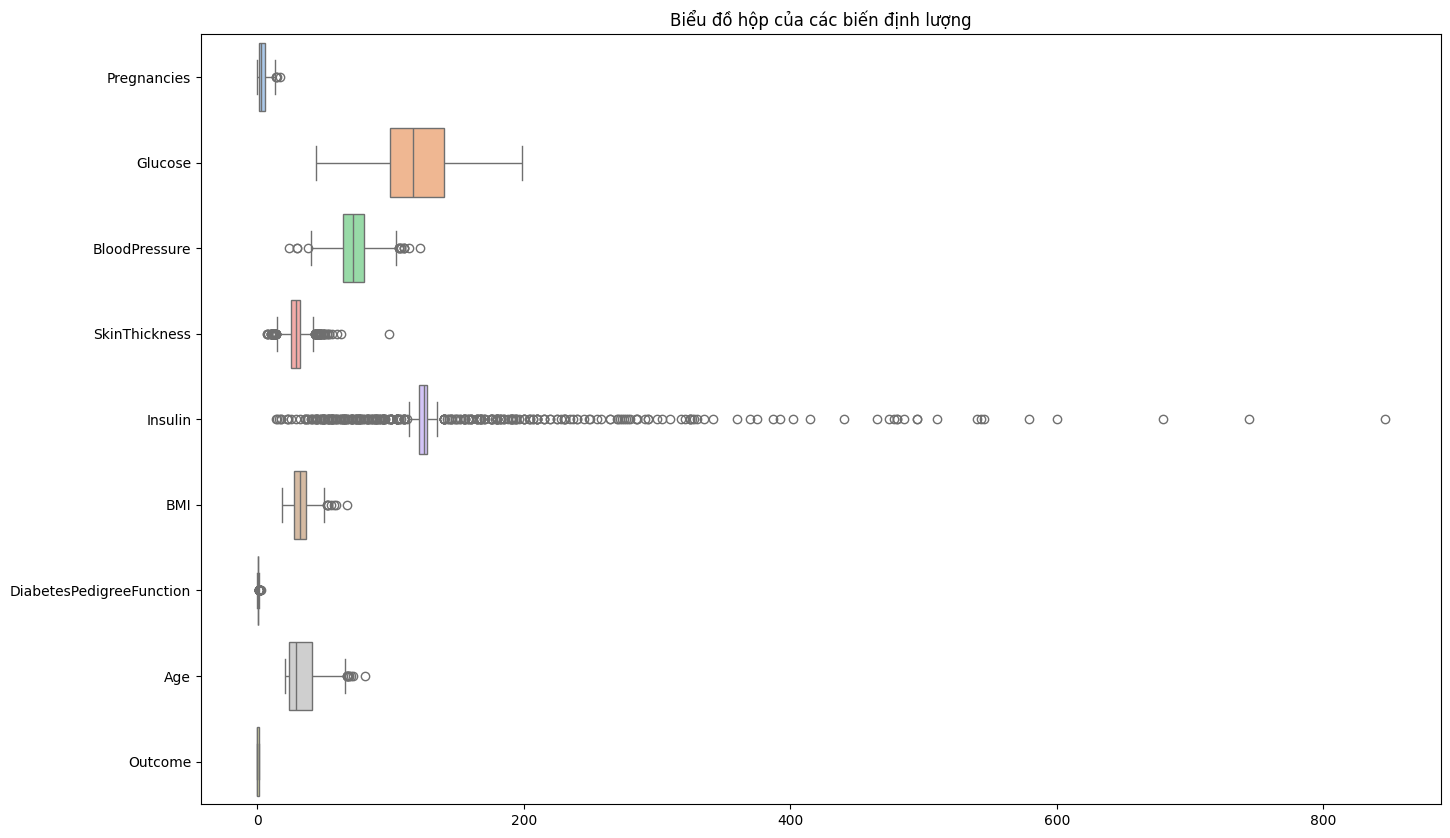

In [11]:
#VẼ BIỂU ĐỒ HỘP (BOXPLOT) ĐỂ XEM NGOẠI LAI
plt.figure(figsize=(16, 10))
sns.boxplot(data=data, orient='h', palette='pastel')
plt.title("Biểu đồ hộp của các biến định lượng")
plt.show()